# Ejercicio 1
 Implementar método implicito de Euler como quieran.

In [213]:
#Este programa implementa el método de Euler implícto para resolver la EDO dx/dt=3x^2+x+1 con un valor incial x(0)=1
function metodo_euler_implicito(f,df,list,x0,h)
     x = x0 #Condición incial de x
     listx=[] #Se da la lista para los puntos de x
     push!(listx,x) #Arregla los valores en un vector
     for i in 2:length(list) #Se itera el proceso hasta el valor del tamaño de list
        t = x+i*h # Los valores de t dependen del valor incial de x y de h(tamaño de los subintervalos)
        x = x -(x-f(x,t)*h)/df(x) #Son los valores de la curva aproximada por la regla recursiva del Metodo de Euler implícito
        push!(listx,x) 
     end
     return listx #Devuelve la lista con los valores de x
end

metodo_euler_implicito (generic function with 1 method)

In [214]:
f(x,t)=3*(x[2])^2+x+1 #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [215]:
df(x)=6x[2]+1 #Corresponde a la derivada de f(x) de acuerdo con el método

df (generic function with 1 method)

In [216]:
#En esta parte de la rutina se puede calcular los valores de t para cada h
function lista_t(x0,h)
    x=x0 #Valor incial de x
     listt=[] #Da la lista de los elementos de t
     for i in 0:10 #Se hacen 10 iteraciones
        t =x+i*h #Fórmula para obtener t 
        push!(listt,t) #Acomoda cada elemento en un vector
     end
     return listt #Devuelve los valores de t
end

lista_t (generic function with 1 method)

In [217]:
list1=lista_t(0,2.0); #la lista corresponde a un valor dado de h

In [218]:
vec1=metodo_euler_implicito(f,df,list1,[0,1],2.0); #Con vec se obtienen la soluciones del sistema para la condición incial x(0)=1 

In [219]:
listx1=map(x->x[2],vec1); #Con listx1 se guardan las entradas de los vectores anteriores y contienen los elementos de los valores de la solución de x para la conción incial x(0)=1

In [220]:
t=linspace(0,10,10) #Se da un intervalo para t

0.0:1.1111111111111112:10.0

In [221]:
#Solución exacta con valor incial en x(0)=1
function r(t)
   return 1+t^3+((t^2)/2)+t 
end;

In [222]:
x=r.(t);

In [223]:
using PyPlot

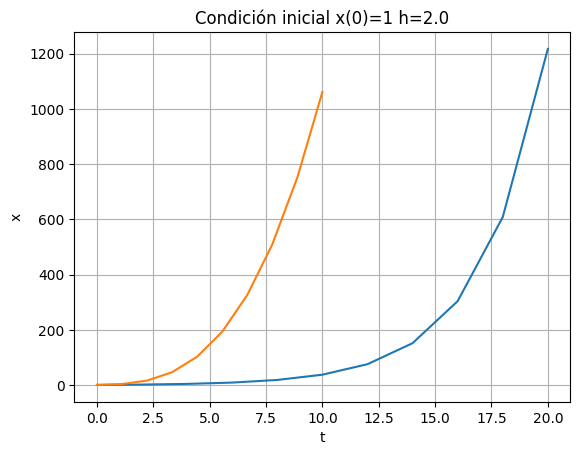

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a97b9710>

In [224]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=2.0")
grid("on")
plot(list1,listx1) #Gráfica naranja corresponde a la solución aproximada en h=2.0
plot(t,x) #Gráfica azul corresponde a la solución exacta

# Ejercicio 2
Implementar Euler: Regla del punto medio.

In [225]:
#Este programa implementa el método de Euler modificado o también concocido como regla del punto medio para resolver la EDO dx/dt=x+t+1 con un valor incial x(0)=1. (Los paso que realiza este programa son análogos a los que se explicaron en el ejercicio 1)
function metodo_euler_modificado(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + ((f(x,t)+f(x+f(x,t)*h,t+h))/2)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler_modificado (generic function with 1 method)

En general el Métdodo de Euler mejorado o modificado es un ejemplo de los métodos de predicción y correción. El valor de $x*_{n+1}$ pronostica un valor de $x(t_{n})$, mientras que el valor de $x_{n+1}$ corrige esta estimación

In [226]:
f(x,t)=x[2]+t+1  #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [227]:
#En esta parte de la rutina se puede calcular los valores de t para cada h
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:10
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [228]:
listt=lista_t(0,0.5);  #la lista corresponde a un valor dado de h

In [229]:
vecX=metodo_euler_modificado(f,listt,[0,1],0.5); #Con vec se obtienen la soluciones del sistema para la condición incial x(0)=1 

In [230]:
listX=map(x->x[2],vecX); #Con vec se obtienen la soluciones del sistema para la condición incial x(0)=1 

In [231]:
t=linspace(0,5,10)

0.0:0.5555555555555556:5.0

In [232]:
function r(t)
   return 4*exp(t)-t-2 
end;

In [233]:
x=r.(t);

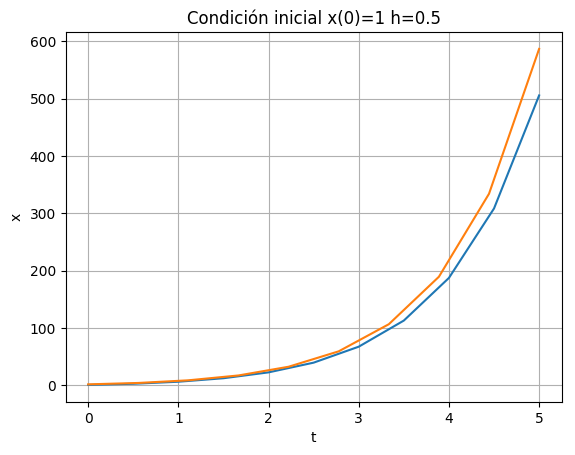

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a967e8d0>

In [234]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=0.5")
grid("on")
plot(listt,listX) #Gráfica naranja corresponde a la solución aproximada en h=0.5
plot(t,x) #Gráfica azul corresponde a la solución exacta

# Ejercicio 3
Implementar método de Runge-Kutta de orden 4.





Método de Runge-Kutta de orden 4

Se trata de un método de un solo paso, por lo que sólo requiere una condición inical para empezar; sin embargo, como un método de cuarto orden, es mucho más exacto que los métodos de Euler. La cantidad $h(s_{1}+2s_{2}+s_{4})/6$ en el método de Runge-Kutta de cuarto orden toma el lugar de la pendiente en el método de Euler. Esta cantidad puede considerarse como una estimación mejorada de la pendiente de la solución en el intervalo $[t_{i},t_{i}+h]$.

In [235]:
#Este programa implementa el método de Runge-Kutta de orden 4 modificado para resolver la EDO dx/dt=x+1 con un valor incial x(0)=1. (Los paso que realiza este programa son análogos a los que se explicaron en el ejercicio 1)
function RK4(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
    t = i*h
#En este paso se sustituyeron los valores de k1, k2, k3 y k4 con la fórmula del método.
      x = x+(1/6)*(f(x,t)*h+2*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h+2*f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h+f(t+h,x+f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h))
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [236]:
f(x,t)=x[1]+1

f (generic function with 1 method)

In [237]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:10
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [238]:
listt=lista_t(0,7.05);

In [239]:
vecX=RK4(f,listt,[0,1],7.05);

In [240]:
listX=map(x->x[2],vecX);

In [241]:
t=linspace(0,5,10) #Se da un intervalo para t

0.0:0.5555555555555556:5.0

In [242]:
#Se calcula la solución exacta
function r(t)
   return (2*exp(t))-1 
end;

In [243]:
x=r.(t); #Valores de la solución exacta

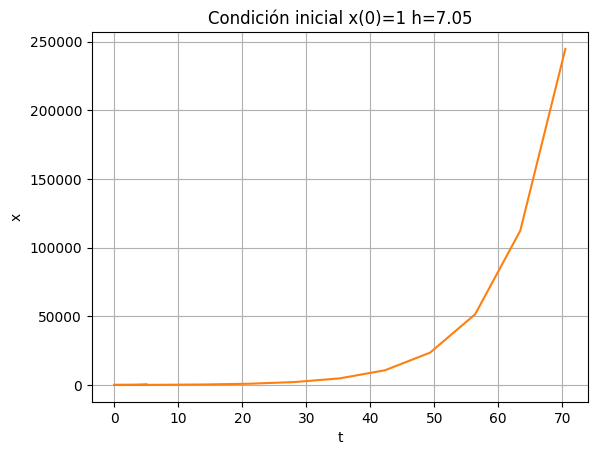

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a95c0e10>

In [244]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=7.05")
grid("on")
plot(t,x) #Gráfica naranja corresponde a la solución exacta
plot(listt,listX) #Gráfica naranja corresponde a la solución aproximada en h=7.05

# Ejercicio 4
Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. Nota: Este es el test para el método de Euler implícito.

In [245]:
function metodo_euler_implicito(f,df,list,x0,h)
     x = x0 #Condición incial de x
     listx=[] #Se da la lista para los puntos de x
     push!(listx,x) #Arregla los valores en un vector
     for i in 2:length(list) #Se itera el proceso hasta el valor del tamaño de list
        t =x+i*h # Los valores de t dependen del valor incial de x y de h(tamaño de los subintervalos)
        x = x -(x+f(x,t)*h)/df(x) #Son los valores de la curva aproximada por la regla recursiva del Metodo de Euler implicto
        push!(listx,x) 
     end
     return listx #Devuelve la lista con los valores de x
end

metodo_euler_implicito (generic function with 1 method)

In [246]:
f(x,t)=(-2.5)*x[2]

f (generic function with 1 method)

In [247]:
df(x)=-2.5

df (generic function with 1 method)

In [248]:
function lista_t(x0,h)
    x=x0 #Valor incial de x
     listt=[] #Da la lista de los elementos de t
     for i in 0:10 #Se hacen 10 iteraciones
        t =x+i*h #Fórmula para obtener t 
        push!(listt,t) #Acomoda cada elemento en un vector
     end
     return listt #Devuelve los valores de t
end

lista_t (generic function with 1 method)

In [249]:
list1=lista_t(0,1.0);
list2=lista_t(0,0.5);
list3=lista_t(0,0.2);
list4=lista_t(0,0.01);

In [250]:
#Con vec_# se obtienen la soluciones del sistema para la condición incial x(0)=1 y para diferentes valores de h
vec1=metodo_euler_implicito(f,df,list1,[0,1],1.0);
vec1=metodo_euler_implicito(f,df,list1,[0,1],1.0);
vec2=metodo_euler_implicito(f,df,list2,[0,1],0.5);
vec3=metodo_euler_implicito(f,df,list3,[0,1],0.2);
vec4=metodo_euler_implicito(f,df,list4,[0,1],0.01);

In [251]:
#De la misma forma que el paso anterior pero ahora para la otra condicón incial x(0)=2 y con valores distintos de h
vec5=metodo_euler_implicito(f,df,list1,[0,2],1.0);
vec6=metodo_euler_implicito(f,df,list2,[0,2],0.5);
vec7=metodo_euler_implicito(f,df,list3,[0,2],0.2);
vec8=metodo_euler_implicito(f,df,list4,[0,2],0.01);

In [252]:
#Con listx_3 se guardan las entradas de los vectores anteriores y contienen los elementos de los valores de la solución de x para la conción incial x(0)=1
listx1=map(x->x[2],vec1);
listx2=map(x->x[2],vec2);
listx3=map(x->x[2],vec3);
listx4=map(x->x[2],vec4);

In [253]:
#Análogamente al paso anterior pero con la condición incial x(0)=2
listx5=map(x->x[2],vec5);
listx6=map(x->x[2],vec6);
listx7=map(x->x[2],vec7);
listx8=map(x->x[2],vec8);

In [254]:
t=linspace(0,10) #Se da un intervalo para t

0.0:0.20408163265306123:10.0

In [255]:
X1=exp.(-2.5*t); #Solución exacta con valor incial en x(0)=1

In [256]:
X2=2*exp.(-2.5*t); #Solución exacta con valor incial en x(0)=2

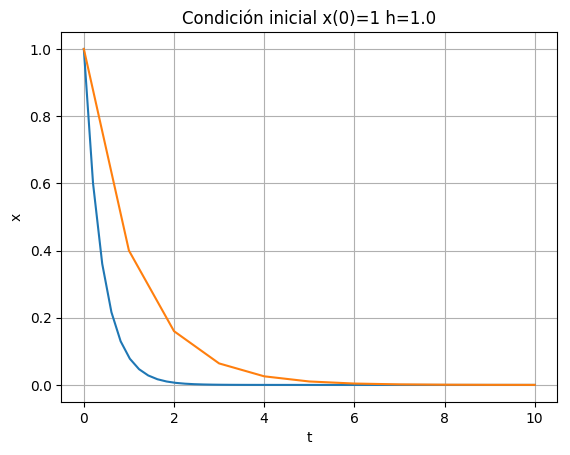

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a950dbd0>

In [257]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=1.0")
grid("on")
plot(t,X1) #Gráfica azul corresponde a la solución exacta
plot(list1,listx1) #Gráfica naranja corresponde a la solución aproximada en h=1.0

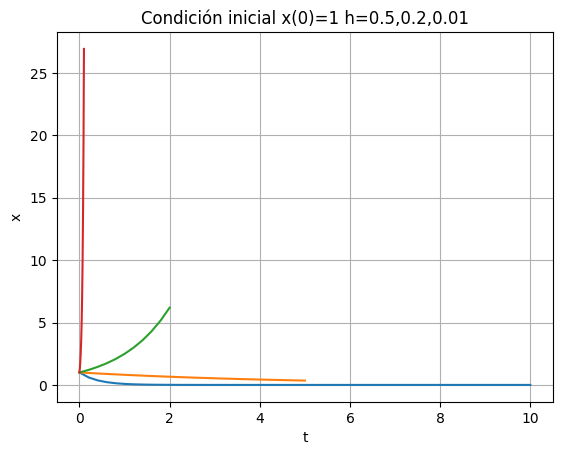

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a9460890>

In [258]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=1 h=0.5,0.2,0.01")
grid("on")
plot(t,X1) #Gráfica azul corresponde a la solución exacta
plot(list2,listx2) #Gráfica naranja corresponde a la solución aproximada en h=0.5
plot(list3,listx3) #Gráfica verde corresponde a la solución aproximada en h=0.2
plot(list4,listx4) #Gráfica rojo corresponde a la solución aproximada en h=0.01

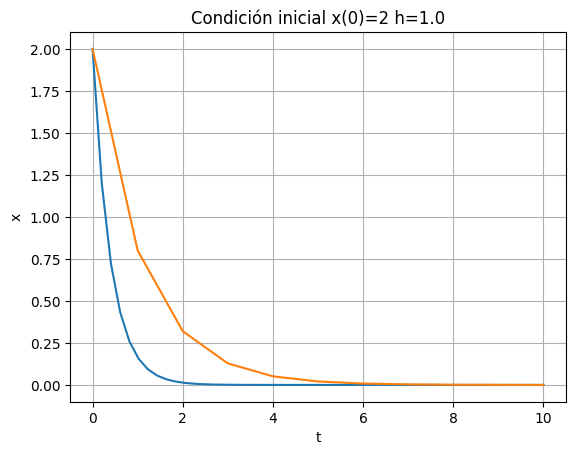

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a9395f50>

In [259]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=2 h=1.0")
grid("on")
plot(t,X2) #Gráfica azul corresponde a la solución exacta
plot(list1,listx5) #Gráfica naranja corresponde a la solución aproximada en h=1.0

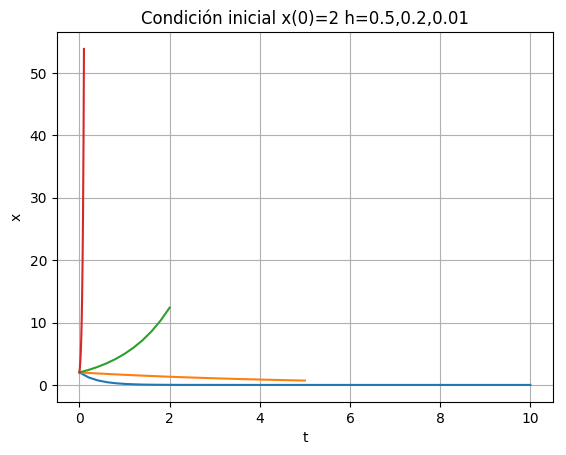

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a9279190>

In [260]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=2 h=0.5,0.2,0.01")
grid("on")
plot(t,X2) #Gráfica azul corresponde a la solución exacta
plot(list2,listx6) #Gráfica naranja corresponde a la solución aproximada en h=0.5
plot(list3,listx7) #Gráfica verde corresponde a la solución aproximada en h=0.2
plot(list4,listx8) #Gráfica roja corresponde a la solución aproximada en h=0.01

# Ejercicio 5
Usar el método del punto medio y de Runge-Kutta para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. Nota: Este es el test para el de Runge-Kutta.

# Métodod de Euler modificado o regla del punto medio

In [261]:
function metodo_euler_modificado(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + ((f(x,t)+f(x+f(x,t)*h,t+h))/2)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler_modificado (generic function with 1 method)

In [262]:
f(x,t)=(2*x[2]-18*t)/(1+t)

f (generic function with 1 method)

In [263]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:10
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [264]:
listt=lista_t(0,1.0);

In [265]:
vecX=metodo_euler_modificado(f,listt,[0,4],1.0);

In [266]:
listX=map(x->x[2],vecX); 

In [267]:
t=linspace(0,10,10) #Se da un intervalo para t

0.0:1.1111111111111112:10.0

In [268]:
#Se calcula la solución exacta
function r(t)
   return 4+8*t-5*t^2 
end;

In [269]:
x=r.(t); #Valores de la solución exacta

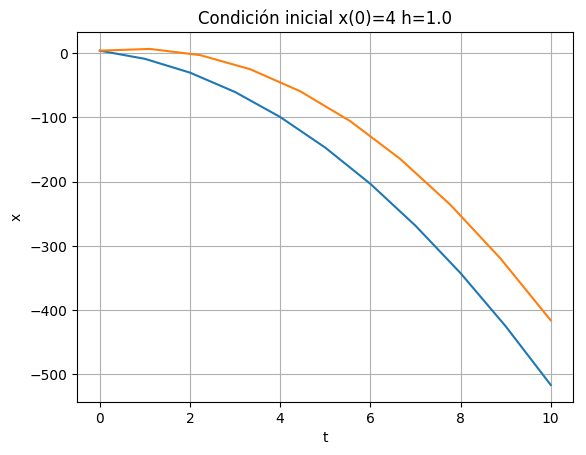

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a91c20d0>

In [270]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=4 h=1.0")
grid("on")
plot(listt,listX) #Gráfica naranja corresponde a la solución aproximada en h=1.0
plot(t,x) #Gráfica azul corresponde a la solución exacta

# Runge-Kutta de orden 4

In [271]:
function RK4(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
    t = i*h
      x = x+(1/6)*(f(x,t)*h+2*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h+2*f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h+f(t+h,x+f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h))
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [272]:
f(x,t)=2*x[1]-18*t[1]*(1+t[1])^-1

f (generic function with 1 method)

In [273]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:15
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [274]:
listt=lista_t(0,1.5);

In [275]:
vecX=RK4(f,listt,[0,4],1.5);

In [276]:
listX=map(x->x[2],vecX); 

In [277]:
t=linspace(0,5,10) #Se da un intervalo para t

0.0:0.5555555555555556:5.0

In [278]:
#Se calcula la solución exacta
function r(t)
   return 4+8*t-5*t^2
end;

In [279]:
x=r.(t); #Valores de la solución exacta

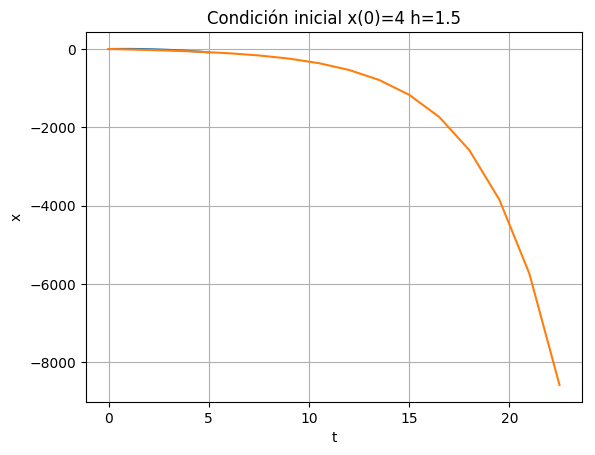

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a90f8f10>

In [280]:
xlabel("t")
ylabel("x")
title("Condición inicial x(0)=4 h=1.5")
grid("on")
plot(t,x) #Gráfica naranja corresponde a la solución exacta
plot(listt,listX) #Gráfica naranja corresponde a la solución aproximada en h=1.5

# Ejercicio 6
Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

In [281]:
#Este programa implementa el método de Euler para resolver la EDO dx/dt=-kx con un valor incial dado.
function metodo_euler_explicito(f,list,U0,h)
     U = U0 #Condición incial de x
     listU=[] #Se da la lista para los puntos de x
     push!(listU,U) #Arregla los valores en un vector
     for i in 2:length(list) #Se itera el proceso hasta el valor del tamaño de list
        x = U+i*h # Los valores de t dependen del valor incial de x y de h(tamaño de los subintervalos)
        U = U + f(U,x)*h #Son los valores de la curva aproximada por la regla recursiva del Metodo de Euler explícito
        push!(listU,U) 
     end
     return listU #Devuelve la lista con los valores de x
end

metodo_euler_explicito (generic function with 1 method)

La ecuación diferencial a resolver para obtener la energía del oscilador armonico esta dada por:
$$F=-\frac{dU}{dx}=-kx$$
Entonces
$$\frac{d^{2}U}{dx^{2}}=k$$
Con la ecuaicón ya establecida podemos resolverla con los métodos de forma vectorial.
Como se explicó en el Ejercicio 3 de la Tarea 11, se puede utilizar el Método de Euler en su forma vectorial, donde cada ecuación del sistema corresponde a una EDO que puede resolverse separadamente con el método. De tal forma que cada ecuación para la energía del oscilador fue nombrada con las siguientes funciones:
$$f(U,x)=\frac{dU}{dx}=u$$
$$g(u,x)=\frac{du}{dx}=k$$
Se tomó el valor de $k=1$ y el tamaño de $h$ fue de 1.0, además se tomó la condición inicial $U(0)=1$ y $u(0)=1$
Para resolver el sistema, primero se observa que resolviendo la segunda EDO se obtiene u, la cual tiene por solución:
$$u=kx+1$$
Sustituyendo en la primera EDO se tiene:
$$f(U,x)=\frac{dU}{dx}=kx+1$$
con k=1
$$f(U,x)=\frac{dU}{dx}=x+1$$
Esta última ecuación es la que se va a resolver con los dos métodos.

In [282]:
f(U,x)=x+1 

f (generic function with 1 method)

In [283]:
#En esta parte de la rutina se puede calcular los valores de x para h=1.0
function lista_x(U0,h)
    U=U0 #Valor incial de x
     listx=[] #Da la lista de los elementos de t
     for i in 0:10 #Se hacen 10 iteraciones
        x =U+i*h #Fórmula para obtener t 
        push!(listx,x) #Acomoda cada elemento en un vector
     end
     return listx #Devuelve los valores de t
end

lista_x (generic function with 1 method)

In [284]:
#Cada lista corresponde a un valor dado de h
listx=lista_x(0,1.0);

In [285]:
#Con vecU se obtienen la soluciones del sistema para la condición incial U(0)=1 para h=1.0
vecU=metodo_euler_explicito(f,listx,[0,1],1.0);

In [286]:
#Con listU se guardan las entradas de los vectores anteriores y contienen los elementos de los valores de la solución de U para la conción incial U(0)=1
listU=map(U->U[2],vecU);

In [287]:
x=linspace(0,50,50) #Se da un intervalo para x

0.0:1.0204081632653061:50.0

In [288]:
#Se calcula la solución exacta
function r(x)
   return (x/2)+((x^2)/2)
end;

In [289]:
u=r.(x); #Valores de la solución exacta

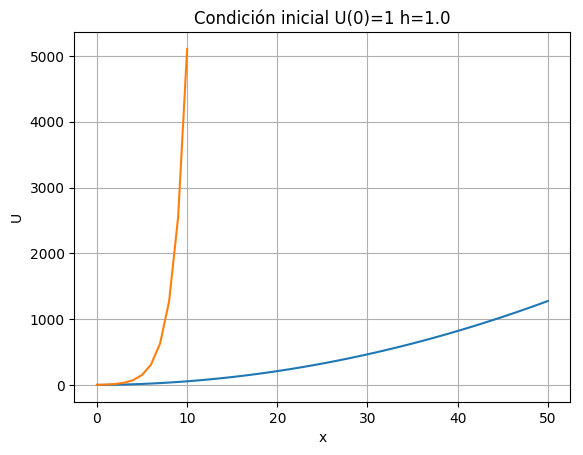

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a9034d50>

In [290]:
xlabel("x")
ylabel("U")
title("Condición inicial U(0)=1 h=1.0")
grid("on")
plot(x,u) #Gráfica azul corresponde a la solución exacta
plot(listx,listU) #Gráfica naranja corresponde a la solución aproximada en h=1.0

In [291]:
function RK4(f,list,U0,h)
     U = U0
     listU=[]
     push!(listU,U)
     for i in 2:length(list)
    x = i*h
      U = U+(1/6)*(f(U,x)*h+2*f(x+(1/2)*h,U+(1/2)*f(U,x)*h)*h+2*f(x+(1/2)*h,U+(1/2)*f(x+(1/2)*h,U+(1/2)*f(U,x)*h)*h)*h+f(x+h,U+f(x+(1/2)*h,U+(1/2)*f(x+(1/2)*h,U+(1/2)*f(U,x)*h)*h)*h))
        push!(listU,U) 
    end
     return listU
end

RK4 (generic function with 1 method)

In [292]:
f(U,x)=x+1

f (generic function with 1 method)

In [293]:
function lista_x(U0,h)
    U=U0
     listx=[]
     for i in 0:10
        x =U+i*h
        push!(listx,x) 
     end
     return listx
end

lista_x (generic function with 1 method)

In [294]:
listx=lista_x(0,2.0);

In [295]:
vecU=RK4(f,listx,[0,1],2.0);

In [296]:
listU=map(U->U[2],vecU); 

In [297]:
x=linspace(0,5,10) #Se da un intervalo para t

0.0:0.5555555555555556:5.0

In [298]:
#Se calcula la solución exacta
function r(x)
   return (x/2)+((x^2)/2)
end;

In [299]:
listu=r.(x); #Valores de la solución exacta

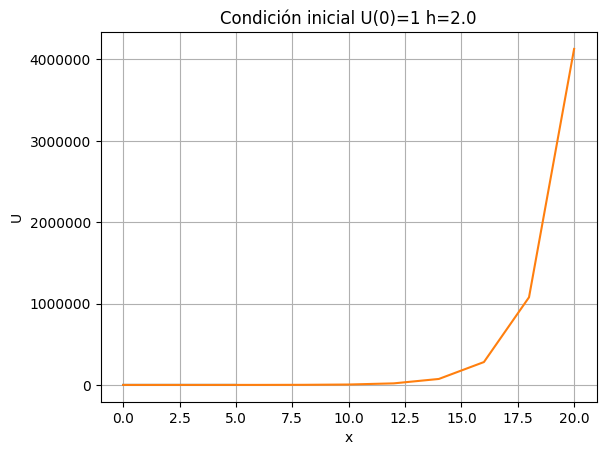

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a8f77cd0>

In [300]:
xlabel("x")
ylabel("U")
title("Condición inicial U(0)=1 h=2.0")
grid("on")
plot(x,listu) #Gráfica naranja corresponde a la solución exacta
plot(listx,listU) #Gráfica naranja corresponde a la solución aproximada en h=2.0

De acuerdo con las gráficas obtenidas, se puede ver que el método de Runge-Kutta efectivamente aproxima mejor al solución, mientras que Euler no se aproxima completamente a la solcuión exacta.

# Eercicio 7
Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

In [301]:
function metodo_euler1(F,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + F(x,t)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler1 (generic function with 1 method)

In [302]:
function metodo_euler2(G,list,u0,h)
     u = u0
     listu=[]
     push!(listu,u)
     for i in 2:length(list)
        t = i*h
        u = u + G(u,t)*h
        push!(listu,u) 
     end
     return listu
end

metodo_euler2 (generic function with 1 method)

In [303]:
F(x,t)=-sin(t) #Se propuso una solución para x(t)=cos(t)

F (generic function with 1 method)

In [304]:
G(u,t)=-cos(t)

G (generic function with 1 method)

In [305]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:60
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [306]:
list=lista_t(0,0.2);

In [307]:
vec1=metodo_euler1(F,list,[0,1],0.2);

In [308]:
vec2=metodo_euler2(G,list,[0,0],0.2);

In [309]:
listx=map(x->x[2],vec1);

In [310]:
listu=map(u->u[2],vec2);

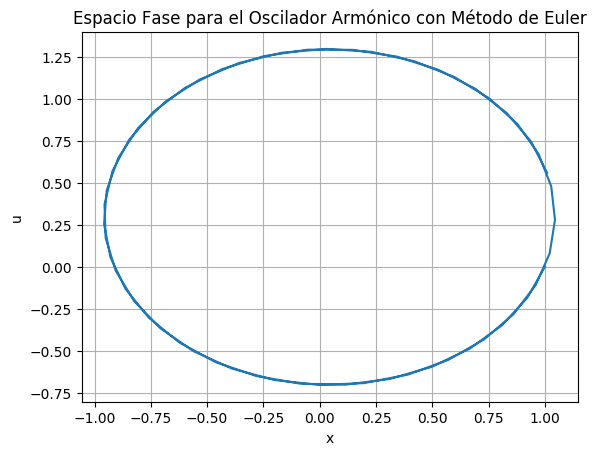

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a8eb5610>

In [311]:
xlabel("x")
ylabel("u")
title("Espacio Fase para el Oscilador Armónico con Método de Euler")
grid("on")
plot(listx,listu)

In [312]:
function RK4_1(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
    t = i*h
      x = x+(1/6)*(f(x,t)*h+2*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h+2*f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h+f(t+h,x+f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h))
        push!(listx,x) 
    end
     return listx
end

RK4_1 (generic function with 1 method)

In [313]:
function RK4_2(g,list,u0,h)
     u = u0
     listu=[]
     push!(listu,u)
     for i in 2:length(list)
    t = i*h
      u = u+(1/6)*(p(u,t)*h+2*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h+2*p(t+(1/2)*h,u+(1/2)*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h)*h+p(t+h,u+p(t+(1/2)*h,u+(1/2)*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h)*h))
        push!(listu,u) 
    end
     return listu
end

RK4_2 (generic function with 1 method)

In [314]:
f(x,t)=-sin(t)

f (generic function with 1 method)

In [315]:
p(u,t)=-cos(t)

p (generic function with 1 method)

In [316]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:60
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [317]:
list=lista_t(0,1.0);

In [318]:
vec1=RK4_1(f,list,[0,0],0.2);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sin(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_1(::#f, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[312]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[318], in expression starting on line 1


In [319]:
vec2=RK4_2(p,list,[0,1],0.9);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_2(::Function, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[313]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[319], in expression starting on line 1


In [320]:
listx=map(x->x[2],vec1);

In [321]:
listu=map(u->u[2],vec2);

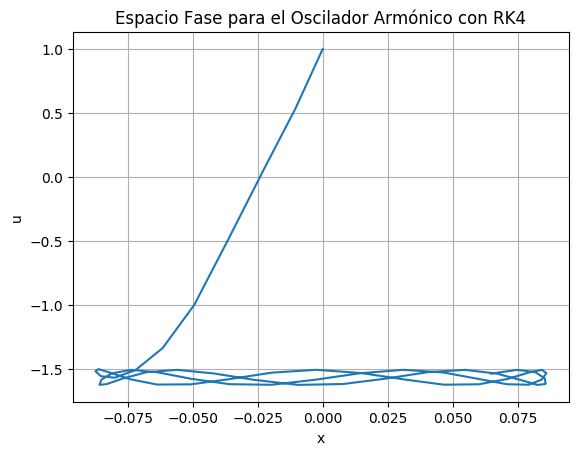

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a8e1a190>

In [322]:
xlabel("x")
ylabel("u")
title("Espacio Fase para el Oscilador Armónico con RK4")
grid("on")
plot(listx,listu)

# Ejercicio 8
Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [323]:
function RK4_1(f,list,x0,h)
     x = x0
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
    t = i*h
      x = x+(1/6)*(f(x,t)*h+2*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h+2*f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h+f(t+h,x+f(t+(1/2)*h,x+(1/2)*f(t+(1/2)*h,x+(1/2)*f(x,t)*h)*h)*h))
        push!(listx,x) 
    end
     return listx
end

RK4_1 (generic function with 1 method)

In [324]:
function RK4_2(g,list,u0,h)
     u = u0
     listu=[]
     push!(listu,u)
     for i in 2:length(list)
    t = i*h
      u = u+(1/6)*(p(u,t)*h+2*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h+2*p(t+(1/2)*h,u+(1/2)*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h)*h+p(t+h,u+p(t+(1/2)*h,u+(1/2)*p(t+(1/2)*h,u+(1/2)*p(u,t)*h)*h)*h))
        push!(listu,u) 
    end
     return listu
end

RK4_2 (generic function with 1 method)

In [325]:
f(x,t)=-sin(t)

f (generic function with 1 method)

In [326]:
p(u,t)=-cos(t)

p (generic function with 1 method)

In [327]:
function lista_t(x0,h)
    x=x0
     listt=[]
     for i in 0:60
        t =x+i*h
        push!(listt,t) 
     end
     return listt
end

lista_t (generic function with 1 method)

In [328]:
list=lista_t(0,1.0);

In [329]:
vec1=RK4_1(f,list,[0,0],0.2);
vec2=RK4_1(f,list,[0,0],0.4);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sin(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_1(::#f, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[323]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[329], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sin(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_1(::#f, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[323]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/I

In [330]:
vec2=RK4_2(p,list,[1,1],0.7);
vec3=RK4_2(p,list,[1,1],0.2);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_2(::Function, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[324]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[330], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::Array{Float64,1}) at ./deprecated.jl:57
 [3] RK4_2(::Function, ::Array{Any,1}, ::Array{Int64,1}, ::Float64) at ./In[324]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.

In [331]:
listx=map(x->x[2],vec1);
listx1=map(x->x[2],vec2);

In [332]:
listu=map(u->u[2],vec2);
listu1=map(u->u[2],vec3);

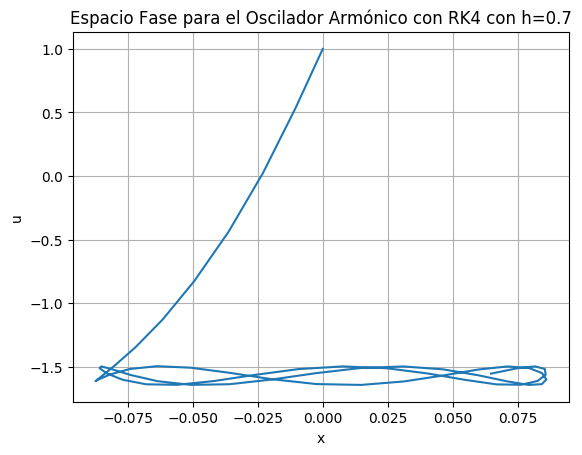

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a8d4bd10>

In [333]:
xlabel("x")
ylabel("u")
title("Espacio Fase para el Oscilador Armónico con RK4 con h=0.7")
grid("on")
plot(listx,listu)

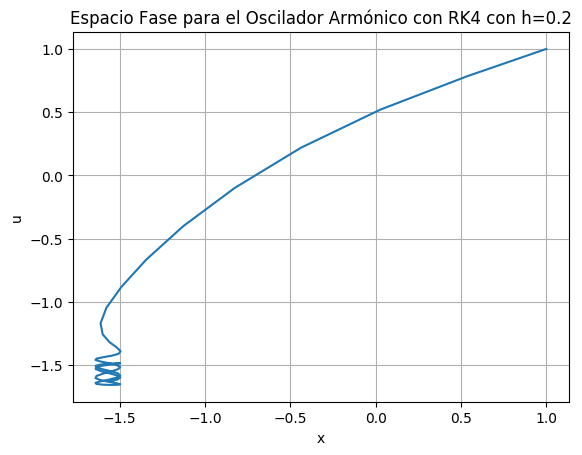

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f53a8c8eb50>

In [334]:
xlabel("x")
ylabel("u")
title("Espacio Fase para el Oscilador Armónico con RK4 con h=0.2")
grid("on")
plot(listx1,listu1)